In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
import string
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv("stress.csv")

In [3]:
data.head(2)

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.125,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857


In [4]:
data.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,2838.000000,2838.000000,2838.000000,2.838000e+03,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,13751.999295,0.524313,0.808972,1.518107e+09,18.262156,4.684272,85.996124,35.240941,40.948231,67.044249,...,1.088001,1.120099,1.000211,1.722759,1.536400,1.879385,0.843517,9.948555,5.448836,0.040740
std,17340.161897,0.499497,0.177038,1.552209e+07,79.419166,3.316435,32.334887,26.486189,31.587117,32.880644,...,0.117159,0.085227,0.006500,0.047835,0.102971,0.058932,0.174794,21.798032,2.535829,0.195490
min,4.000000,0.000000,0.428571,1.483274e+09,0.000000,-6.620000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.485400,1.200000,1.561150,0.140000,0.000000,-1.918000,-1.000000
25%,926.250000,0.000000,0.600000,1.509698e+09,2.000000,2.464243,65.000000,12.410000,12.135000,41.070000,...,1.000000,1.000000,1.000000,1.691430,1.469745,1.841782,0.750000,2.000000,3.729973,-0.072222
50%,1891.500000,1.000000,0.800000,1.517066e+09,5.000000,4.321886,81.000000,29.420000,33.520000,80.710000,...,1.000000,1.142900,1.000000,1.721430,1.530295,1.878250,0.890000,5.000000,5.210000,0.044821
75%,25473.750000,1.000000,1.000000,1.530898e+09,10.000000,6.505657,101.000000,55.057500,69.320000,96.180000,...,1.142900,1.142900,1.000000,1.751760,1.596030,1.916243,1.000000,10.000000,6.855217,0.166667
max,55757.000000,1.000000,1.000000,1.542592e+09,1435.000000,24.074231,310.000000,99.000000,99.000000,99.000000,...,1.900000,1.500000,1.200000,2.007400,2.066670,2.158490,1.000000,416.000000,21.198919,1.000000


In [5]:
data.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [6]:
data.shape

(2838, 116)

In [7]:
np.unique(data['label'])

array([0, 1], dtype=int64)

In [8]:
print(data.isnull().sum())

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64


In [9]:
final_data=pd.DataFrame(data[['text','label']])

<AxesSubplot:xlabel='index', ylabel='label'>

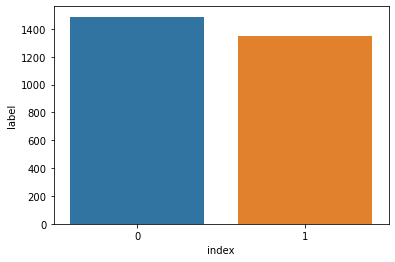

In [10]:
chart=final_data['label'].value_counts().reset_index()
sns.barplot(x='index',y=final_data['label'].value_counts(),data=chart)


In [11]:
final_data.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [12]:
final_data['text'][0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

## Preprocessing of Text data

In [13]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sayal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [15]:
final_data["text"] =final_data["text"].apply(clean)

In [16]:
final_data['label']=final_data['label'].map({0:'No Stress',1:"Stress"})

In [17]:
final_data.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


## using BOW and BernoulliNB model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
x=final_data['text']
y=final_data['label']
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

In [38]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1901, 7842) (1901,)
(937, 7842) (937,)


In [39]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

In [40]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [41]:
print(model.score(x_train,y_train)*100)
print(model.score(x_test,y_test)*100)

91.95160441872699
74.70651013874067


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

   No Stress       0.95      0.87      0.91       906
      Stress       0.89      0.96      0.93       995

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901



In [43]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

   No Stress       0.79      0.64      0.70       444
      Stress       0.72      0.85      0.78       493

    accuracy                           0.75       937
   macro avg       0.75      0.74      0.74       937
weighted avg       0.75      0.75      0.74       937



In [46]:
a=input("Enter String: ")
data=vectorizer.transform([a]).toarray()
result=model.predict(data)
print(result)

Enter String: mental health is as important as physical health
['No Stress']


In [48]:
a=input("Enter String: ")
data=vectorizer.transform([a]).toarray()
result=model.predict(data)
print(result)

Enter String: sometimes I feel like I need a help
['Stress']


In [49]:
print(X.shape)

(2838, 7842)


In [50]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## using Tf-idf vectorizer and BernoulliNB model

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tf_idf=TfidfVectorizer()

In [40]:
x_val=tf_idf.fit_transform(x)

In [41]:
print(x_val.shape)

(2838, 7842)


In [63]:
final=tf_idf.get_feature_names()
print(len(y))

2838


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_val,y,random_state=42,test_size=0.33)

In [44]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1901, 7842) (1901,)
(937, 7842) (937,)


In [45]:
from sklearn.naive_bayes import BernoulliNB

In [46]:
m=BernoulliNB()
m.fit(x_train,y_train)

BernoulliNB()

In [47]:
y_pred_train=m.predict(x_train)
y_pred_test=m.predict(x_test)

In [48]:
print(m.score(x_train,y_train)*100)
print(m.score(x_test,y_test)*100)

91.95160441872699
74.70651013874067


Accuracy of tfidf with BernoulliNB and BOW with BernoulliNB is same

In [65]:
a=input("Enter String: ")
data=tf_idf.transform([a]).toarray()
result=model.predict(data)
print(result)

Enter String: I think I need to take care of my mental health
['No Stress']


In [66]:
a=input("Enter String: ")
data=tf_idf.transform([a]).toarray()
result=model.predict(data)
print(result)

Enter String:  Sometime I feel like I need some help
['Stress']
